In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

In [2]:
kr10_input = np.load('01 - Krajbich 2010/input.npy')
kr10_output = np.load('01 - Krajbich 2010/output.npy')

tv_input = np.load('02 - Tavares 2017/input.npy')
tv_output = np.load('02 - Tavares 2017/output.npy')

sp_perc_input = np.load('03 - Sepulveda 2020/input_perceptual.npy')
sp_perc_output = np.load('03 - Sepulveda 2020/output_perceptual.npy')

sp_value_input = np.load('03 - Sepulveda 2020/input_value.npy')
sp_value_output = np.load('03 - Sepulveda 2020/output_value.npy',)

yang_input = np.load('04 - Yang 2024/input.npy')
yang_output = np.load('04 - Yang 2024/output.npy')

kr11_input = np.load('05 - Krajbich 2011/input.npy')
kr11_output = np.load('05 - Krajbich 2011/output.npy')

In [3]:
def prediction_plot(drifts, X, fig, n_row, n_col, cur, study='', title=False):
    
    fig.add_subplot(n_row, n_col, cur)
    if X.shape[1] == 8:
        plt.scatter(X[:, 0] + X[:, 1] - X[:, 2] - X[:, 3],
                    drifts[:, 0] - drifts[:, 1], alpha=0.4, c='green');
    elif X.shape[1] == 6:
        plt.scatter(X[:, 2] - 0.5*(X[:, 0] + X[:, 1]), 
                    drifts[:, 2] - 0.5*(drifts[:, 1] + drifts[:, 0]), alpha=0.4, c='green');
    else:
        plt.scatter(X[:, 0] - X[:, 1], drifts[:, 0] - drifts[:, 1], alpha=0.4, c='green');
    plt.ylabel(r'$v_{right} - v_{left}$');
    plt.xlabel(r'$Value_{righ} - Value_{left}$ ');
    
    fig.add_subplot(n_row, n_col, cur+1)
    if X.shape[1] == 8:
        plt.scatter(X[:, 4] + X[:, 5] - X[:, 6] - X[:, 7],
                    drifts[:, 0] - drifts[:, 1], alpha=0.4, c='green');
    elif X.shape[1] == 6:
        plt.scatter(X[:, 5] - 0.5*(X[:, 4] + X[:, 3]),
                    drifts[:, 2] - 0.5*(drifts[:, 1] + drifts[:, 0]), alpha=0.4, c='green');
    else:
        plt.scatter(X[:, 2] - X[:, 3], drifts[:, 0] - drifts[:, 1], alpha=0.4, c='green');
    plt.xlabel(r'$Gaze_{right} - Gaze_{left}$ ');

    fig.add_subplot(n_row, n_col, cur+2)
    if X.shape[1] == 8:
        a1 = X[:, 0]*X[:, 4] +X[:, 1]*X[:, 5]
        a2 = X[:, 2]*X[:, 6] +X[:, 3]*X[:, 7]
        plt.scatter(a1 - a2, drifts[:, 0] - drifts[:, 1], alpha=0.4, c='green');
    elif X.shape[1] == 6:
        g1v1 = X[:, 3]*X[:, 0]
        g2v2 = X[:, 4]*X[:, 1]
        g3v3 = X[:, 5]*X[:, 2]
        plt.scatter(g3v3 - 0.5*(g1v1 + g2v2), 
                    drifts[:, 2] - drifts[:, 1], alpha=0.4, c='green');
    else:
        
        plt.scatter(X[:, 2]*X[:, 0] - X[:, 3]*X[:, 1] , 
                    drifts[:, 0] - drifts[:, 1], alpha=0.4, c='green');
    plt.xlabel(r'$Gaze_{right} Value_{righ} - Gaze_{left} Value_{left}$ ');
    
    return fig
    

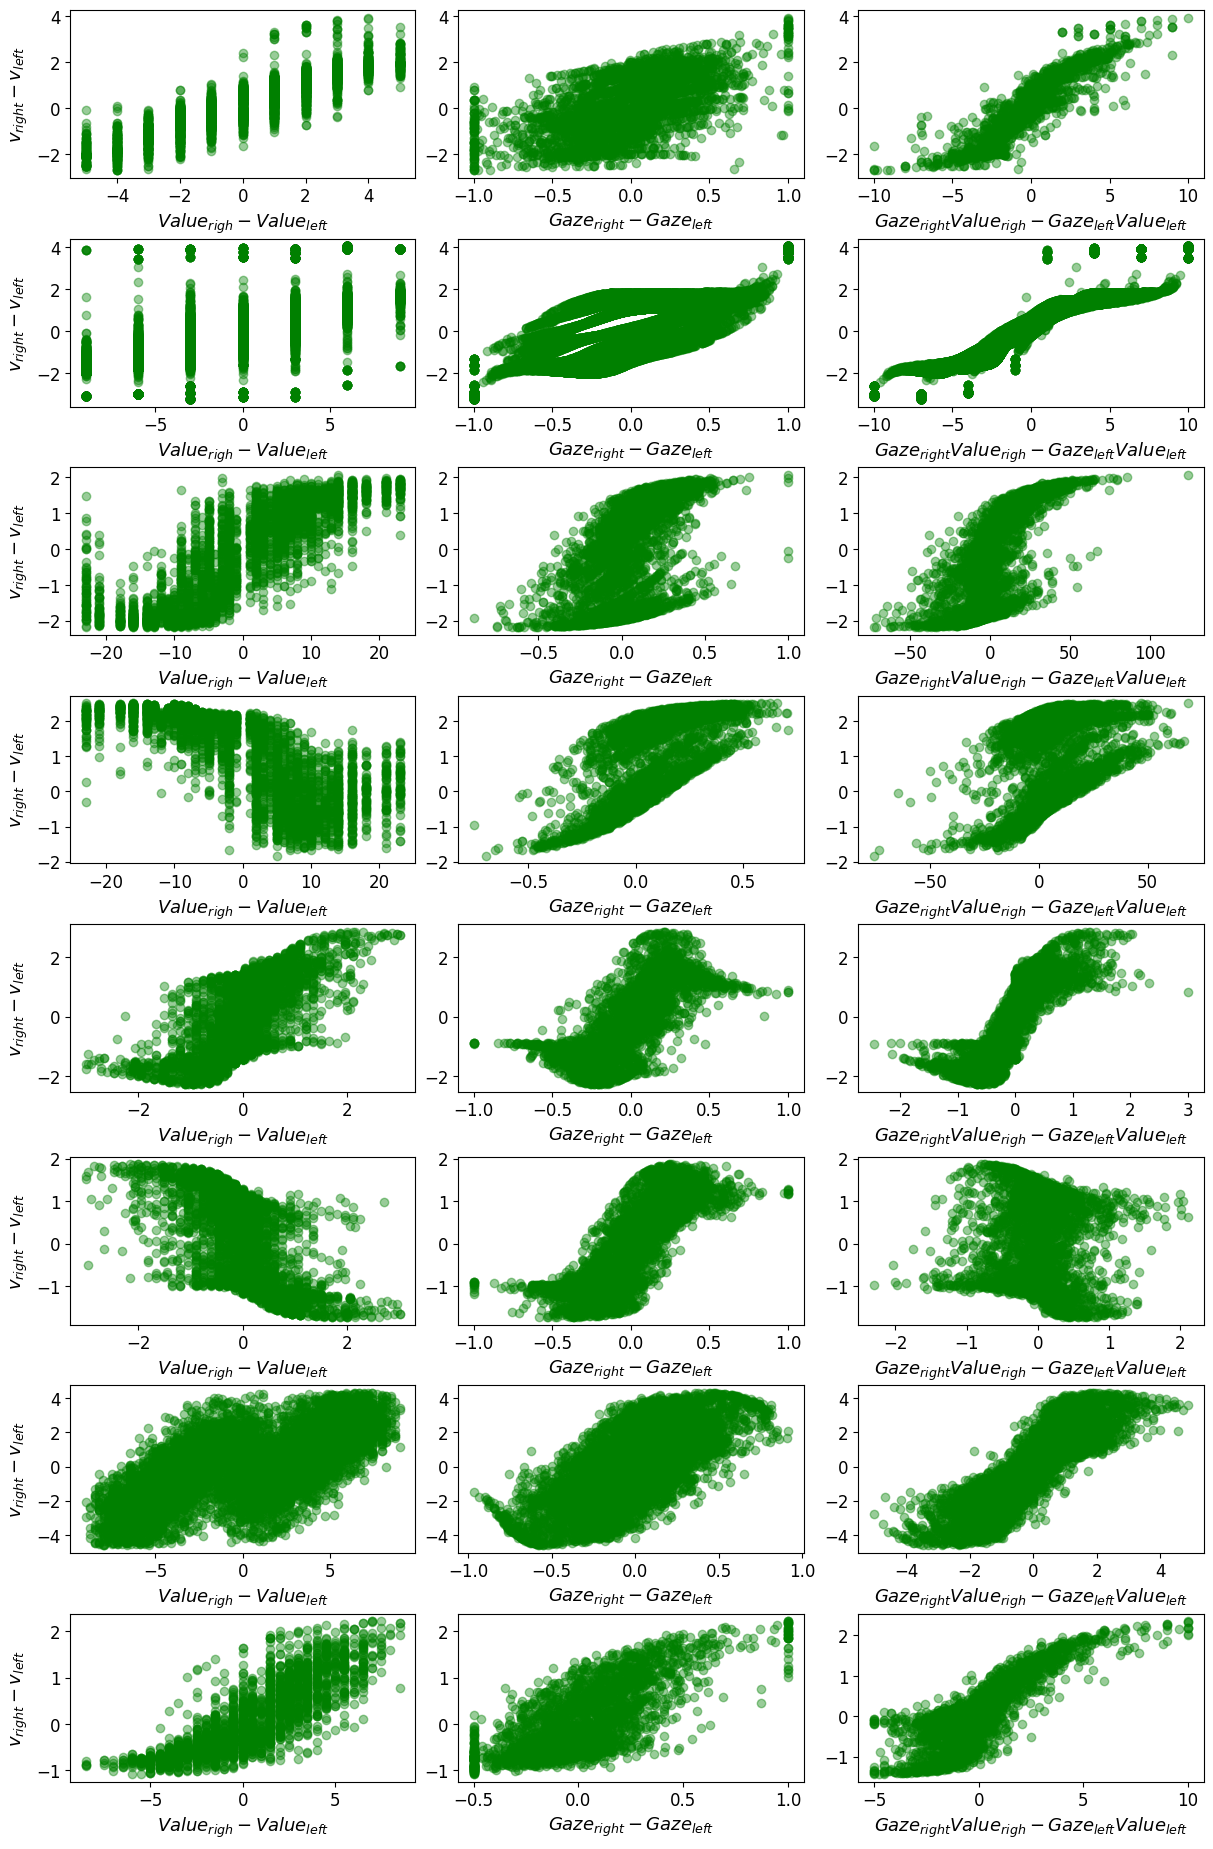

In [4]:
fig = plt.figure(figsize=(12, 20), layout='constrained')

n_rows = 9
n_cols = 3
start = 1

fig = prediction_plot(kr10_output, kr10_input, fig, n_rows, n_cols, start, title=True)

fig = prediction_plot(tv_output, tv_input, fig, n_rows, n_cols, start+1*3)

fig = prediction_plot(sp_perc_output[sp_perc_input[:, -1]==1, :], 
                      sp_perc_input[sp_perc_input[:, -1]==1, :], fig, n_rows, n_cols, start+2*3)
fig = prediction_plot(sp_perc_output[sp_perc_input[:, -1]==-1, :], 
                      sp_perc_input[sp_perc_input[:, -1]==-1, :], fig, n_rows, n_cols, start+3*3)

fig = prediction_plot(sp_value_output[sp_value_input[:, -1]==1, :], 
                      sp_value_input[sp_value_input[:, -1]==1, :], fig, n_rows, n_cols, start+4*3)
fig = prediction_plot(sp_value_output[sp_value_input[:, -1]==-1, :], 
                      sp_value_input[sp_value_input[:, -1]==-1, :], fig, n_rows, n_cols, start+5*3)

fig = prediction_plot(yang_output, yang_input, fig, n_rows, n_cols, start+6*3)

fig = prediction_plot(kr11_output, kr11_input, fig, n_rows, n_cols, start+7*3)

plt.savefig('../_01_Figures/estimated_drifts.pdf', 
            dpi=600, 
            transparent=True, 
            bbox_inches='tight');